In [13]:
import pandas as pd
import numpy as np
import pickle
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.model_selection import train_test_split

In [14]:
df = pd.read_csv('data/fake_users_data.csv', index_col=0)

In [15]:
df = pd.get_dummies(df, prefix=['age', 'gender', 'type', 'diff', 'comp', 'trans'], columns=['age', 'gender', 'type_route', 'difficulty','accompaniment', 'transport'])

In [16]:
X = df.drop(columns=['route'], axis=1)
y = df[['route']]

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [18]:
rnd_clf = RandomForestClassifier(n_estimators=500,
                                 max_leaf_nodes=16,
                                 random_state=42)
rnd_clf.fit(X_train, y_train)

y_pred_rf = rnd_clf.predict(X_test)

C:\Users\Paris\AppData\Local\Temp\ipykernel_14340\2477965460.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rnd_clf.fit(X_train, y_train)


In [19]:
accuracy_score(y_test, y_pred_rf)

0.6658333333333334

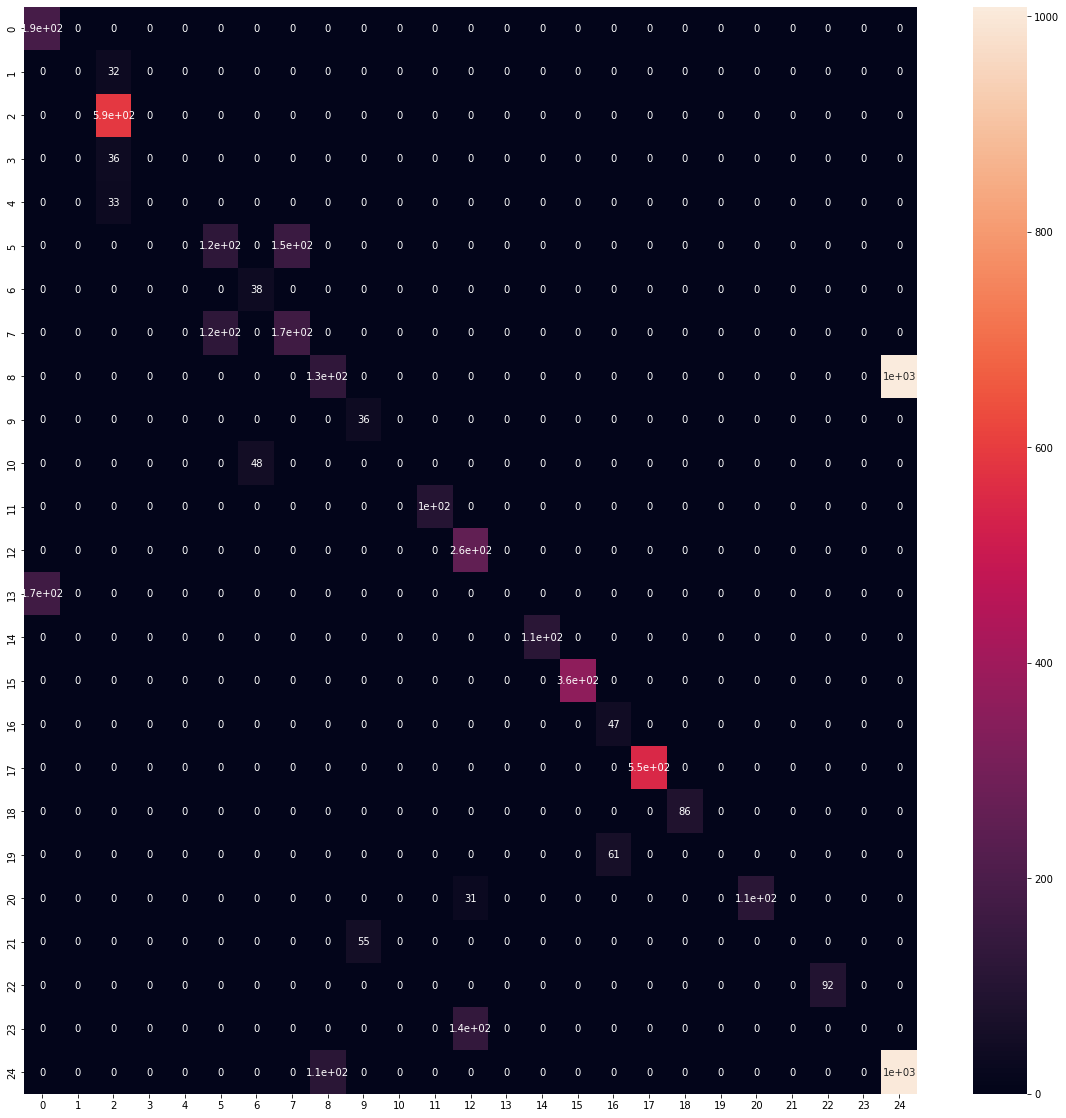

In [20]:
plt.figure(figsize=(20,20))
sns.heatmap(confusion_matrix(y_test, y_pred_rf), annot=True);

In [21]:
# Guardar modelo
filename = 'model/finished_model.pkl'
with open(filename, 'wb') as archivo_salida:
    pickle.dump(rnd_clf, archivo_salida)